In [10]:
# imports
import numpy as np
import os
import tqdm
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from utils.dataset import SeparationDataset
from utils.transforms import STFT, ISTFT
from torch.autograd import Variable

In [11]:
# init dataset
HOME = os.path.expanduser("~")
TEST = os.path.join(HOME, "storage", "separation", "pt_f_test")
TRAIN = os.path.join(HOME, "storage", "separation", "pt_f_train")
train_ds = SeparationDataset(TRAIN)
test_ds = SeparationDataset(TEST)
print(f"Training set contains {len(train_ds)} samples.")
print(f"Testing set contains {len(test_ds)} samples.")

Training set contains 100 samples.
Testing set contains 50 samples.


torch.Size([1, 1, 512, 16843]), torch.Size([1, 1, 512, 16843]), torch.Size([1, 1, 16843])
torch.Size([1, 1, 512, 16843]), torch.Size([1, 1, 512, 16843]), torch.Size([1, 1, 16843])


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

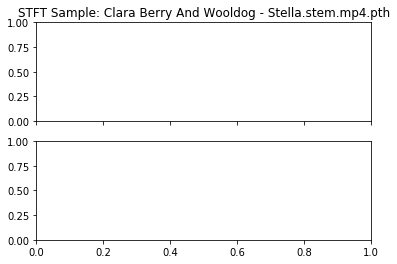

In [44]:
# sampe from dataset
idx = 0

sample = train_ds[idx]

print(f"{sample['mix'][0].shape}, {sample['mix'][1].shape}, {sample['mix'][2].shape}")
      
magnitude, phase, ac = sample['mix']

print(f"{magnitude.shape}, {phase.shape}, {ac.shape}")
      
w_size = 512
      
f, subplot = plt.subplots(2, sharex=True)

subplot[0].set_title("STFT Sample: {}".format(train_ds.filenames[idx]))
subplot[0].set_xlim(range(w_size), np.transpose(magnitude.detach().numpy()[0, :, :, 0]))
subplot[0].set_ylabel("STFT Mix (Magnitude)")
subplot[1].plot(range(w_size), np.transpose(phase.detach().numpy()[0, :, :, 0]))
subplot[1].set_ylabel("STFT Mix (Phase)")
      
plt.show()

In [18]:
# configuration

dtype = torch.float

device = torch.device("cpu") # Uncomment this to run on CPU
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# XXX can probably pass num_workers=4
# we also need to use a batch size of 1 since we have a dimension mismatch 
# (i.e. there's a different amount of samples depending on the song)
dataloader = DataLoader(train_ds, batch_size=1, shuffle=True)
testloader = DataLoader(test_ds, batch_size=1, shuffle=True)

In [ ]:
# hyperparams




In [5]:
# main training loop
for i, sample in enumerate(dataloader):
    # do something here. For now we'll just print the sample
    print(i, sample['mix'].size(), sample['vocals'].size())

0 torch.Size([1, 1, 11353088, 2]) torch.Size([1, 1, 11353088, 2])
1 torch.Size([1, 1, 1523712, 2]) torch.Size([1, 1, 1523712, 2])
2 torch.Size([1, 1, 11659264, 2]) torch.Size([1, 1, 11659264, 2])
3 torch.Size([1, 1, 9014272, 2]) torch.Size([1, 1, 9014272, 2])
4 torch.Size([1, 1, 8011776, 2]) torch.Size([1, 1, 8011776, 2])
5 torch.Size([1, 1, 9739264, 2]) torch.Size([1, 1, 9739264, 2])
6 torch.Size([1, 1, 10175488, 2]) torch.Size([1, 1, 10175488, 2])
7 torch.Size([1, 1, 8914944, 2]) torch.Size([1, 1, 8914944, 2])
8 torch.Size([1, 1, 761856, 2]) torch.Size([1, 1, 761856, 2])
9 torch.Size([1, 1, 10935296, 2]) torch.Size([1, 1, 10935296, 2])
10 torch.Size([1, 1, 10536960, 2]) torch.Size([1, 1, 10536960, 2])
11 torch.Size([1, 1, 10438656, 2]) torch.Size([1, 1, 10438656, 2])
12 torch.Size([1, 1, 10222592, 2]) torch.Size([1, 1, 10222592, 2])
13 torch.Size([1, 1, 13972480, 2]) torch.Size([1, 1, 13972480, 2])
14 torch.Size([1, 1, 9300992, 2]) torch.Size([1, 1, 9300992, 2])
15 torch.Size([1, 1, 